# Итоги выполнения ДЗ по уроку 2 (Масштабирование признаков. Регуляризация. Стохастический градиентный спуск)

Задание 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска (GD) и стохастического градиентного спуска (SGD). Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [102]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [103]:
x, y, coef = datasets.make_regression(n_samples=1000, 
                                      n_features = 3, 
                                      noise = 1, 
                                      coef = True, 
                                      random_state = 2)

In [104]:
coef

array([47.47242031, 73.12753896, 38.17938558])

(array([[  3.,  40.,  87., 204., 296., 240.,  96.,  29.,   5.,   0.],
        [  5.,  26., 105., 232., 297., 214.,  92.,  28.,   1.,   0.],
        [  5.,  26., 118., 242., 292., 200.,  85.,  24.,   5.,   3.]]),
 array([-3.32687011, -2.58331383, -1.83975756, -1.09620129, -0.35264501,
         0.39091126,  1.13446753,  1.8780238 ,  2.62158008,  3.36513635,
         4.10869262]),
 <a list of 3 Lists of Patches objects>)

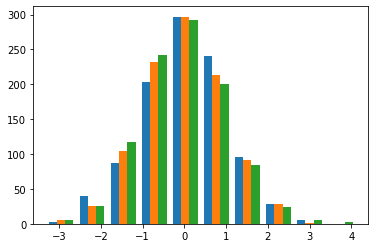

In [105]:
plt.hist(x)

Сгенерированные данные не имеют большого разброса по масштабу признаков. В рамках задания использую эти данные без нормализации и стандартизации.

In [106]:
# функция расчета ошибки MSE для применения в последующих алгоритмах задания
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [107]:
err_list1 = []
err_list2 = []


# Метод стохастического градиентного спуска
def GD(x, y, iterations, alpha):
    np.random.seed(42)
    w = np.random.randn(x.shape[1])
    n = x.shape[0]
    global err_list1
       
    for i in range(1, iterations + 1):
        y_pred = np.dot(x, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), x))
        err_list1.append(err)
        if i % (iterations / 10) == 0:
            print(i, w, err)
               
    return w, err_list1

# Метод стохастического градиентного спуска
def SGD(x, y, iterations, qty_in_batch, alpha):
    np.random.seed(42)
    w = np.random.randn(x.shape[1])
    n = x.shape[0]
    global err_list2
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            x_tmp = x[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(x_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            err_list2.append(err)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), x_tmp))
            if i % (iterations / 10) == 0:
                print(i, w, err)
                        
    return w, err_list2

In [108]:
err_list1 = []
GD(x, y, iterations = 4000, alpha=1e-3) 
# w фактическая из сгенерированного набора данных 47.47242031, 73.12753896, 38.17938558

400 [26.83733989 39.73856164 22.79127913] 1804.1694198657465
800 [38.39004572 57.90395514 31.91922501] 358.6571728117873
1200 [43.46295001 66.18726065 35.65983442] 72.33442674819733
1600 [45.6932596  69.96804131 37.18199375] 15.30785407828522
2000 [46.67507236 71.69531964 37.79615461] 3.886719126459332
2400 [47.10785108 72.48514345 38.04137154] 1.586609449070748
2800 [47.29887793 72.84661088 38.13799595] 1.1208459299348146
3200 [47.3833145  73.01217388 38.17542523] 1.0260247606212491
3600 [47.42069021 73.08806602 38.18959652] 1.0066207923871209
4000 [47.43725876 73.12288003 38.19479251] 1.0026303221780617


(array([47.43725876, 73.12288003, 38.19479251]),
 [9104.225820798758,
  9067.301065776124,
  9030.52638340459,
  8993.901162567652,
  8957.42479464202,
  8921.096673487426,
  8884.916195436474,
  8848.882759284545,
  8812.99576627971,
  8777.254620112732,
  8741.658726907057,
  8706.207495208893,
  8670.900335977294,
  8635.736662574298,
  8600.715890755127,
  8565.83743865838,
  8531.100726796307,
  8496.505178045101,
  8462.050217635255,
  8427.73527314191,
  8393.559774475303,
  8359.523153871203,
  8325.62484588142,
  8291.864287364342,
  8258.240917475487,
  8224.754177658146,
  8191.403511634013,
  8158.188365393882,
  8125.108187188372,
  8092.162427518696,
  8059.350539127459,
  8026.671976989504,
  7994.126198302784,
  7961.712662479286,
  7929.4308311359755,
  7897.280168085789,
  7865.260139328668,
  7833.370213042607,
  7801.609859574771,
  7769.978551432617,
  7738.475763275078,
  7707.100971903766,
  7675.853656254215,
  7644.733297387172,
  7613.739378479896,
  7582.8713

In [109]:
err_list2 = []
SGD(x, y, iterations = 4000, qty_in_batch=500, alpha=1e-3)
# w 47.47242031, 73.12753896, 38.17938558

400 [26.80871243 39.69431373 22.76820809] 1906.1956169445787
400 [26.82861953 39.72575285 22.78362576] 1701.4555281441696
800 [38.37367044 57.87791665 31.90662178] 378.6812332116221
800 [38.38239789 57.89228977 31.91289162] 339.07738489616804
1200 [43.45408723 66.17270843 35.65339279] 76.31416946108472
1200 [43.4579123  66.17928412 35.65592567] 68.55761145257736
1600 [45.68863181 69.96017809 37.17884647] 16.12854689517455
1600 [45.69030463 69.96318795 37.17986457] 14.550496613189273
2000 [46.67271669 71.69117032 37.79466763] 4.075983316197974
2000 [46.6734435  71.69254809 37.7950775 ] 3.714740523310574
2400 [47.10667555 72.48299205 38.04068701] 1.6452134333976105
2400 [47.10698601 72.48362218 38.04085552] 1.5324181271517079
2800 [47.29830161 72.84551049 38.13768669] 1.1503435285546189
2800 [47.2984286  72.84579788 38.13776085] 1.0924331204536653
3200 [47.38303741 73.01161726 38.17528652] 1.0481105752544178
3200 [47.38308344 73.0117474  38.17532452] 1.004200359461386
3600 [47.42056067 7

(array([47.4371957 , 73.1227664 , 38.19478141]),
 [9624.330195732593,
  8565.719325555816,
  9585.285110376664,
  8531.027039345125,
  9546.398747020583,
  8496.475567768604,
  9507.67045925571,
  8462.064338105109,
  9469.099603310637,
  8427.79277996748,
  9430.6855380404,
  8393.660325292996,
  9392.427624915768,
  8359.666408333898,
  9354.32522801254,
  8325.810465647925,
  9316.3777140009,
  8292.091936088911,
  9278.584452134823,
  8258.510260797404,
  9240.944814241499,
  8225.064883191335,
  9203.45817471083,
  8191.755248956708,
  9166.123910484956,
  8158.580806038361,
  9128.941401047821,
  8125.541004630721,
  9091.910028414795,
  8092.635297168631,
  9055.029177122313,
  8059.863138318205,
  9018.298234217582,
  8027.223984967711,
  8981.71658924833,
  7994.717296218503,
  8945.283634252566,
  7962.34253337599,
  8908.99876374843,
  7930.099159940623,
  8872.861374724027,
  7897.9866415989545,
  8836.870866627367,
  7866.004446214694,
  8801.026641356286,
  7834.152043819

Text(0.5, 1.0, 'MSE')

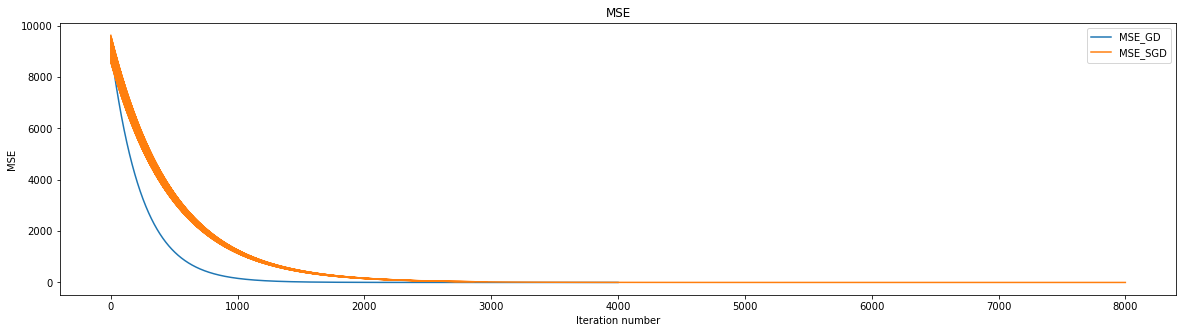

In [110]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(err_list1, label = 'MSE_GD')
ax.plot(err_list2, label = 'MSE_SGD')
ax.legend(loc='upper right')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration number')
ax.set_title('MSE')

Судя по графику, скорость сходимости метода градиентного спуска выше, чем стохастического градиентного спуска (MSE снижается до минимальных значений медленнее, после большего количества итераций) 

Задание 2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.

In [111]:
err_list3 = []
err_list4 = []

# Метод стохастического градиентного спуска
def GD_L2(x, y, iterations, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(x.shape[1])
    n = x.shape[0]
    global err_list3
    for i in range(1, iterations + 1):
        y_pred = np.dot(x, w)
        err = calc_mse(y, y_pred)
        err_list3.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), x) + 2 * lambda_ * w)
           
        if i % (iterations / 10) == 0:
            print(i, w, err)
               
    return w, err_list3

# Метод стохастического градиентного спуска
def SGD_L2(x, y, iterations, qty_in_batch, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(x.shape[1])
    n = x.shape[0]
    global err_list4
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            x_tmp = x[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(x_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            err_list4.append(err)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), x_tmp) + 2 * lambda_ * w)
            if i % (iterations / 10) == 0:
                print(i, w, err)
                        
    return w, err_list4

In [112]:
err_list3 = []
w_lgd = []
GD_L2(x, y, iterations = 4000, alpha=1e-3, lambda_=1e-8) # w 47.47242031, 73.12753896, 38.17938558, 

# метод градиентного спуска без регуляции с аналогичными параментрами: 
# 4000 [47.43725876 73.12288003 38.19479251] 1.0026303221780617

400 [26.8373398  39.7385615  22.79127906] 1804.1694355605582
800 [38.39004549 57.90395479 31.91922483] 358.6571900032527
1200 [43.46294968 66.18726014 35.65983417] 72.33443783915087
1600 [45.69325921 69.9680407  37.18199345] 15.307859991124303
2000 [46.67507194 71.69531897 37.79615429] 3.8867220179162625
2400 [47.10785064 72.48514274 38.0413712 ] 1.586610804528084
2800 [47.29887748 72.84661016 38.13799561] 1.1208465521259208
3200 [47.38331405 73.01217315 38.17542489] 1.0260250433168654
3600 [47.42068975 73.08806527 38.18959618] 1.0066209202374985
4000 [47.4372583  73.12287928 38.19479216] 1.002630379899217


(array([47.4372583 , 73.12287928, 38.19479216]),
 [9104.225820798758,
  9067.301065777763,
  9030.526383408589,
  8993.901162574733,
  8957.42479465289,
  8921.096673502792,
  8884.91619545703,
  8848.88275931098,
  8812.99576631271,
  8777.254620152966,
  8741.658726955196,
  8706.207495265595,
  8670.900336043213,
  8635.736662650084,
  8600.715890841417,
  8565.837438755807,
  8531.100726905495,
  8496.505178166675,
  8462.050217769822,
  8427.73527329008,
  8393.559774637672,
  8359.523154048367,
  8325.624846073968,
  8291.864287572847,
  8258.240917700527,
  8224.754177900286,
  8191.403511893815,
  8158.188365671902,
  8125.108187485157,
  8092.162427834787,
  8059.350539463396,
  8026.671977345815,
  7994.126198679992,
  7961.71266287791,
  7929.430831556526,
  7897.280168528775,
  7865.2601397945855,
  7833.370213531954,
  7801.609860088032,
  7769.978551970279,
  7738.475763837617,
  7707.100972491652,
  7675.8536568679165,
  7644.733298027145,
  7613.739379146599,
  7582.871

Вывод по итогу применения метода градиентного спуска: результат применения метода градиентного спуска без регуляризации L2 и метода с регуляризацией L2 практически идентичны. Применение регуляризации практически не изменило предсказания модели.

In [113]:
err_list4 = []
SGD_L2(x, y, iterations = 4000, qty_in_batch=500, alpha=1e-3, lambda_=1e-8) # w 47.47242031, 73.12753896, 38.17938558
# метод стохастического градиентного спуска без регуляции с аналогичными параментрами: 
# 4000 [47.4371957  73.1227664  38.19478141] 0.9836706279621016

400 [26.80871225 39.69431346 22.76820793] 1906.1956501580194
400 [26.82861934 39.72575257 22.7836256 ] 1701.4555577737017
800 [38.37366998 57.87791596 31.90662141] 378.68126955203974
800 [38.38239744 57.89228908 31.91289125] 339.0774173522343
1200 [43.45408657 66.17270741 35.65339227] 76.31419289502277
1200 [43.45791164 66.1792831  35.65592515] 68.55763241158327
1600 [45.68863103 69.96017687 37.17884587] 16.12855938886983
1600 [45.69030386 69.96318673 37.17986397] 14.550507795193745
2000 [46.67271585 71.69116898 37.79466699] 4.075989431874393
2000 [46.67344265 71.69254674 37.79507686] 3.7147459901467883
2400 [47.10667467 72.48299063 38.04068635] 1.6452163090783778
2400 [47.10698513 72.48362077 38.04085486] 1.5324206833933225
2800 [47.29830071 72.84550904 38.13768601] 1.1503448585838882
2800 [47.29842769 72.84579643 38.13776018] 1.0924342848520006
3200 [47.38303649 73.01161579 38.17528584] 1.0481111901342905
3200 [47.38308252 73.01174593 38.17532384] 1.0042008783976453
3600 [47.42055975

(array([47.43719477, 73.12276491, 38.19478073]),
 [9624.330195732593,
  8565.71932555731,
  9585.285110380635,
  8531.027039350654,
  9546.398747030058,
  8496.475567779522,
  9507.670459272202,
  8462.064338122762,
  9469.09960333564,
  8427.792779993195,
  9430.685538075402,
  8393.66032532809,
  9392.427624962236,
  8359.666408379666,
  9354.325228071926,
  8325.810465705657,
  9316.377714074646,
  8292.091936159883,
  9278.584452224346,
  8258.510260882877,
  9240.944814348206,
  8225.064883292553,
  9203.458174836114,
  8191.755249074908,
  9166.123910630196,
  8158.580806174765,
  9128.941401214384,
  8125.541004786534,
  9091.910028604023,
  8092.635297345053,
  9055.029177335544,
  8059.863138516415,
  9018.298234456135,
  8027.223985188881,
  8981.71658951351,
  7994.717296463791,
  8945.283634545667,
  7962.34253364654,
  8908.998764070726,
  7930.09916023757,
  8872.861375076784,
  7897.986641923415,
  8836.870867011834,
  7866.004446567777,
  8801.0266417737,
  7834.1520442

Результаты применеия метода стохастического градиентного спуска без регуляризации L2 и метода с регуляризацией L2 так же практически идентичны по полученным резельтатам коэффициентов

Text(0.5, 1.0, 'MSE')

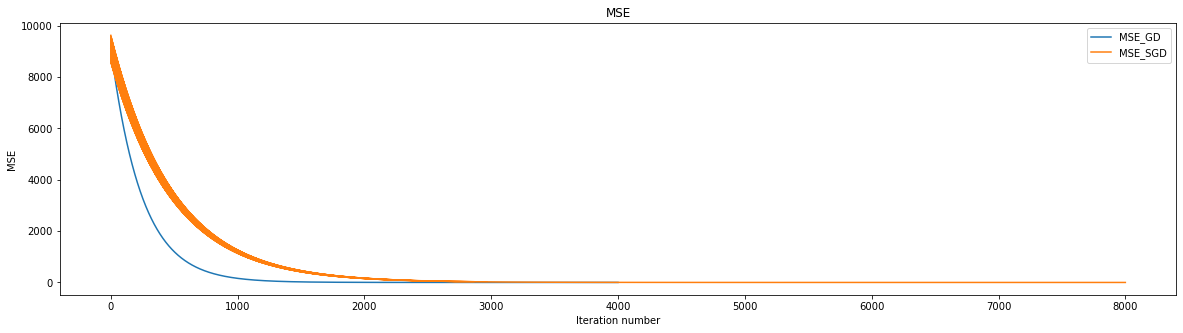

In [115]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(err_list3, label = 'MSE_GD')
ax.plot(err_list4, label = 'MSE_SGD')
ax.legend(loc='upper right')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration number')
ax.set_title('MSE')

Задание 3.Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

Использовала формулу из урока. Для дополнения алгоритмов определила производную от суммы модулей w. Исходила из того, что производная от суммы = сумме производных, т.е. необходимо вычислить производную модуля. Можно определить тождество: |w|=√(w^2 ) и поиск производной модуля уже искать от него. 
Такой вывод получился: (√(w^2 ))'=1/(2⋅√(w^2 ))⋅2w = w / √(w^2 )= w /|w|

In [116]:
err_list5 = []
err_list6 = []

# Метод стохастического градиентного спуска
def GD_L1(x, y, iterations, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(x.shape[1])
    n = x.shape[0]
    global err_list5
    for i in range(1, iterations + 1):
        y_pred = np.dot(x, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), x) + lambda_ * w / abs(w))
        err_list5.append(err)
        if i % (iterations / 10) == 0:
            print(i, w, err)
               
    return w, err_list5

# Метод стохастического градиентного спуска
def SGD_L1(x, y, iterations, qty_in_batch, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(x.shape[1])
    n = x.shape[0]
    global err_list6
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            x_tmp = x[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(x_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            err_list6.append(err)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), x_tmp) + lambda_* w / abs(w))
            if i % (iterations / 10) == 0:
                print(i, w, err)
                        
    return w, err_list6

In [118]:
err_list5 = []
GD_L1(x, y, iterations = 4000, alpha=1e-3, lambda_=1e-8) 
# реальные значения из сгенерированной совокупности w 47.47242031, 73.12753896, 38.17938558
# метод градиентного спускапредсказания w без регуляции с аналогичными параментрами: 
# 4000 [47.43725876 73.12288003 38.19479251] 1.0026303221780617

400 [26.83733989 39.73856164 22.79127913] 1804.1694202537756
800 [38.39004571 57.90395514 31.91922501] 358.65717305834625
1200 [43.46295001 66.18726064 35.65983442] 72.33442687164366
1600 [45.69325959 69.9680413  37.18199374] 15.307854135668004
2000 [46.67507236 71.69531964 37.79615461] 3.886719152393629
2400 [47.10785108 72.48514344 38.04137153] 1.5866094606630776
2800 [47.29887792 72.84661088 38.13799595] 1.1208459350953568
3200 [47.3833145  73.01217388 38.17542522] 1.0260247629161805
3600 [47.42069021 73.08806601 38.18959652] 1.0066207934079652
4000 [47.43725875 73.12288002 38.1947925 ] 1.0026303226325919


(array([47.43725875, 73.12288002, 38.1947925 ]),
 [9104.225820798758,
  9067.301065776484,
  9030.526383408172,
  8993.901162574437,
  8957.424794651984,
  8921.096673500553,
  8884.916195452746,
  8848.882759303939,
  8812.995766302209,
  8777.254620138317,
  8741.65872693571,
  8706.207495240591,
  8670.900336012017,
  8635.736662612033,
  8600.715890795853,
  8565.837438702074,
  8531.100726842953,
  8496.505178094685,
  8462.050217687753,
  8427.735273197304,
  8393.559774533576,
  8359.52315393234,
  8325.6248459454,
  8291.864287431143,
  8258.240917545096,
  8224.754177730543,
  8191.403511709181,
  8158.188365471803,
  8125.108187269029,
  8092.162427602071,
  8059.350539213536,
  8026.671977078264,
  7994.126198394211,
  7961.712662573362,
  7929.430831232684,
  7897.280168185112,
  7865.260139430588,
  7833.370213147108,
  7801.6098596818365,
  7769.97855154223,
  7738.475763387222,
  7707.100972018425,
  7675.853656371373,
  7644.733297506811,
  7613.739378602002,
  7582.871

В данном случае применение регулризации L1 так же практически не повлияло на результат применения модели градиентного спуска по полученным весам и ошибке при заданных исходных параметрах, аналогичных модели без регуляризации.

In [119]:
err_list6 = []
SGD_L1(x, y, iterations = 4000, qty_in_batch=500, alpha=1e-3, lambda_=1e-8) # w 47.47242031, 73.12753896, 38.17938558
f = []
f = err_list6
# метод стохастического градиентного спуска без регуляции с аналогичными параментрами: 
# 4000 [47.4371957  73.1227664  38.19478141] 0.9836706279621016

400 [26.80871243 39.69431373 22.76820808] 1906.1956177691463
400 [26.82861952 39.72575284 22.78362576] 1701.4555288716538
800 [38.37367043 57.87791665 31.90662177] 378.6812337358772
800 [38.38239788 57.89228976 31.91289161] 339.07738535838934
1200 [43.45408722 66.17270842 35.65339278] 76.31416972374679
1200 [43.45791229 66.17928411 35.65592566] 68.55761168402927
1600 [45.6886318  69.96017808 37.17884646] 16.128547017386698
1600 [45.69030462 69.96318794 37.17986456] 14.550496720766194
2000 [46.67271669 71.69117031 37.79466762] 4.07598337151423
2000 [46.67344349 71.69254808 37.79507749] 3.7147405718932487
2400 [47.10667554 72.48299204 38.04068701] 1.6452134581898725
2400 [47.106986   72.48362217 38.04085551] 1.5324181488198405
2800 [47.2983016  72.84551048 38.13768668] 1.150343539651476
2800 [47.29842859 72.84579787 38.13776084] 1.0924331300482444
3200 [47.3830374  73.01161725 38.17528651] 1.048110580246032
3200 [47.38308343 73.01174739 38.17532451] 1.0042003636750214
3600 [47.42056066 7

При использовании метода стохастического градиентного спуска применение регулризации L1 так же практически не повлияло на результат работы модели. Возможно, в данном случае это связано с особенностями данных, сгенерированных в учебных целях. 

Text(0.5, 1.0, 'MSE')

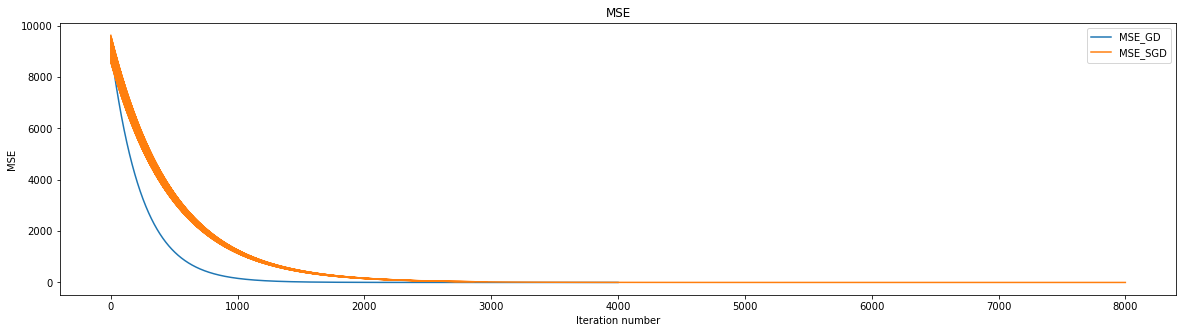

In [120]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(err_list5, label = 'MSE_GD')
ax.plot(err_list6, label = 'MSE_SGD')
ax.legend(loc='upper right')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration number')
ax.set_title('MSE')